<a href="https://colab.research.google.com/github/thaletipothurajumeghana/git/blob/main/handwriten_character.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow tensorflow-datasets matplotlib


In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

# Load the EMNIST byclass dataset
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

print(f"Number of classes: {ds_info.features['label'].num_classes}")  # Should print 62


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.1HU5OG_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.1HU5OG_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/byclass/3.1.0. Subsequent calls will reuse this data.
Number of classes: 62


In [ ]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.transpose(image, perm=[1, 0, 2])  # fix rotation
    return image, tf.one_hot(label, 62)

# Prepare batches
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

train_ds = ds_train.map(preprocess, num_parallel_calls=AUTOTUNE).shuffle(10000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_ds = ds_test.map(preprocess, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(62, activation='softmax')  # 62 classes for byclass
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │         7,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,742 (905.24 KB)

 Trainable params: 231,742 (905.24 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_ds, validation_data=test_ds, epochs=10)


Epoch 1/10
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 666s 61ms/step - accuracy: 0.7867 - loss: 0.6841 - val_accuracy: 0.8548 - val_loss: 0.3991
Epoch 2/10
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 649s 59ms/step - accuracy: 0.8569 - loss: 0.3935 - val_accuracy: 0.8619 - val_loss: 0.3752
Epoch 3/10
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 626s 57ms/step - accuracy: 0.8651 - loss: 0.3638 - val_accuracy: 0.8617 - val_loss: 0.3769
Epoch 4/10
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 630s 58ms/step - accuracy: 0.8700 - loss: 0.3470 - val_accuracy: 0.8635 - val_loss: 0.3671
Epoch 5/10
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 630s 58ms/step - accuracy: 0.8735 - loss: 0.3348 - val_accuracy: 0.8626 - val_loss: 0.3728
Epoch 6/10
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 637s 58ms/step - accuracy: 0.8760 - loss: 0.3248 - val_accuracy: 0.8641 - val_loss: 0.3726
Epoch 7/10
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 658s 60ms/step - accuracy: 0.8782 - loss: 0.3173 - val_accuracy: 0.8642 - val_loss: 0.3745
Epoch 8/10
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 688s 61ms/s

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2%}")


1818/1818 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.8624 - loss: 0.3980
Test Accuracy: 86.20%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 


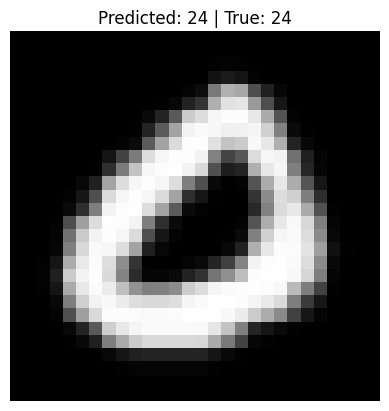

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get class names
class_names = ds_info.features['label'].names

for images, labels in test_ds.take(1):
    pred = model.predict(images)
    pred_class = np.argmax(pred[0])
    true_class = np.argmax(labels[0].numpy())

    plt.imshow(images[0].numpy().squeeze(), cmap='gray')
    plt.title(f"Predicted: {class_names[pred_class]} | True: {class_names[true_class]}")
    plt.axis('off')
    plt.show()


In [ ]:
model.save("emnist_byclass_cnn_model.h5")
